# Measuring 5-sigma Depth Curves

In this notebook we will extract an object light curve from the Twinkles field, and measure the 5-sigma limiting depth at each epoch. The reason to do this is to start trying to understand the error properties of the `Monitor` light curves (including their biases) as a function of observation properties, such as image quality and image depth.

### Requirements

You will need the DESC `Monitor` and its dependencies.

You will also need to set up an SSH tunnel to NERSC scidb where the Twinkles PServ data is stored. Follow directions [here](https://github.com/DarkEnergyScienceCollaboration/Monitor/#setting-up-ssh-tunnel-for-database-access) and use the following code from the command line.
```
ssh -L 3307:scidb1.nersc.gov:3306 $USER@cori.nersc.gov
```

In [1]:
import desc.monitor
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/Bryce/anaconda/opt/lsst/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/Bryce/anaconda/opt/lsst/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


## An Example Object Light Curve

Let's pull out one of the Twinkles objects and visualize it.

In [80]:
dbConn = desc.monitor.dbConnection.dbInterface(database='DESC_Twinkles_Level_2',
                                               host='127.0.0.1', port='3307',
                                               driver='mysql')

In [ ]:
lc = desc.monitor.LightCurve(dbConn)
lc.build_lightcurve_from_db(objid=48253)

In [ ]:
fig = lc.visualize_lightcurve()

## The Matching Depth Curve

Now let's measure the 5-sigma limiting depth (for a point source). We do this by selecting a number of stars from the field, and then for each epoch, querying their flux errors, converting to limiting depth, and then averaging (with sigma-clipping) over the ensemble. All this is done by the `measure_depth_curve()` method.

In [81]:
worker = desc.monitor.Monitor(dbConn)
#worker.get_lightcurves([48253])
worker.get_lightcurves([111])

In [78]:
worker.return_lightcurve[48253].visualize_lightcurve(using='mag')
plt.show()

KeyError: 48253

In [82]:
dc = worker.measure_depth_curve() 
#worker.measure_depth_curve(using='ForcedSources', from='DM')

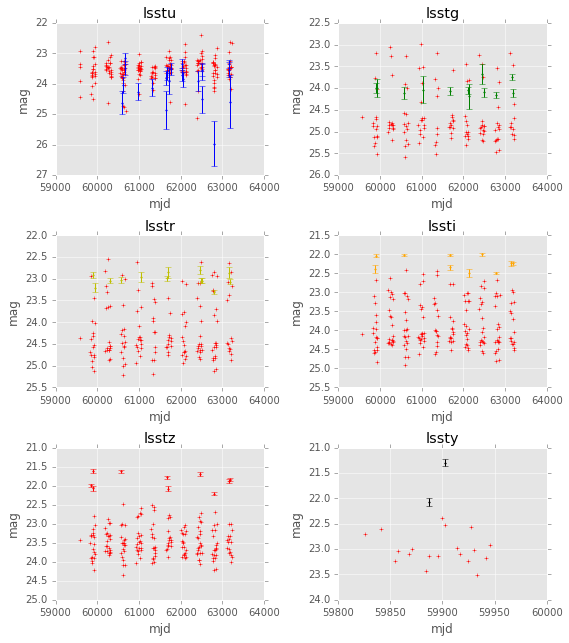

In [85]:
#fig = worker.return_lightcurve[48253].visualize_lightcurve(using='mag')
fig = worker.return_lightcurve[111].visualize_lightcurve(using='mag')
dc.visualize_lightcurve(using='mag', include_errors=False, use_existing_fig=fig)
plt.show()